# Al Fihriya Academy: Let's solve a classification problem on Kaggle.
Problem: [Stumbleupon: Content quality classification](https://www.kaggle.com/c/stumbleupon/overview).

## Reading training data from Kaggle.

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
_ = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle competitions download -c stumbleupon

test.tsv.zip: Skipping, found more recently modified local copy (use --force to force download)
raw_content.zip: Skipping, found more recently modified local copy (use --force to force download)
train.tsv.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

'kaggle (1).json'   sample_data		   test.tsv	  train.tsv.zip
 kaggle.json	    sampleSubmission.csv   test.tsv.zip
 raw_content.zip    submission.csv	   train.tsv


In [ ]:
!unzip train.tsv.zip

Archive:  train.tsv.zip
replace train.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!unzip  test.tsv.zip

Archive:  test.tsv.zip
replace test.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## Data analysis.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!ls

'kaggle (1).json'   sample_data		   test.tsv	  train.tsv.zip
 kaggle.json	    sampleSubmission.csv   test.tsv.zip
 raw_content.zip    submission.csv	   train.tsv


In [ ]:
raw_df = pd.read_csv('train.tsv', sep='\t')
df = raw_df.copy()
del df['framebased']
del df['urlid']
del df['alchemy_category_score']
df['is_news'] = df['is_news'].str.replace('?', '0').astype(int)

In [ ]:
df.sample(2).T

,3975,3873
url,http://allrecipes.com/Recipe/paska-bread/Detai...,http://blogs.babble.com/family-kitchen/2011/06...
boilerplate,"{""title"":""Paska Bread Recipe Allrecipes com pa...","{""title"":""Classic Cobb Salad with Red Wine Lem..."
alchemy_category,recreation,recreation
avglinksize,2.15929,2.17007
commonlinkratio_1,0.440678,0.5
commonlinkratio_2,0.19209,0.353333
commonlinkratio_3,0.0621469,0.2
commonlinkratio_4,0.0225989,0.153333
compression_ratio,1.03529,0.430948
embed_ratio,0,0


In [ ]:
df.label.mean()

0.5133198106828939

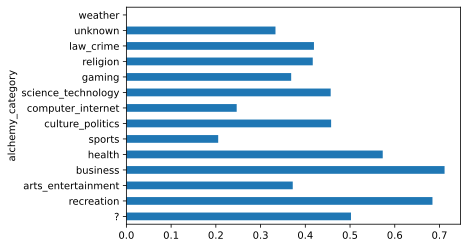

In [ ]:
df.groupby('alchemy_category').label.agg(['mean', 'count']).sort_values('count', ascending=False)['mean'].plot.barh()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


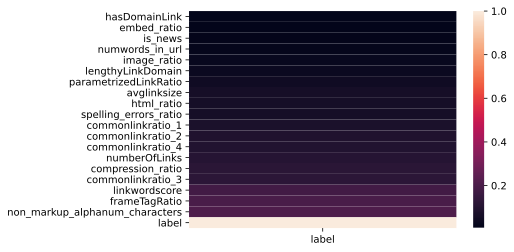

In [ ]:
import seaborn as sns
sns.heatmap(df.corr('spearman').abs()[['label']].sort_values('label'))

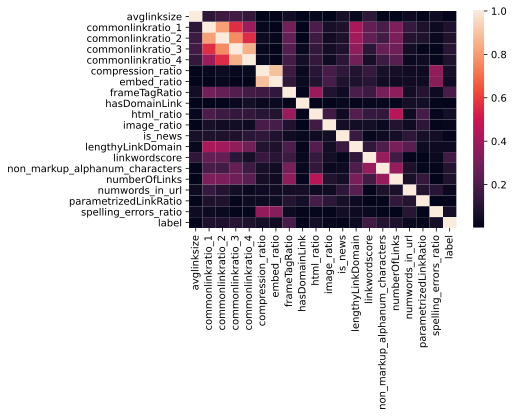

In [ ]:
sns.heatmap(df.corr().abs())

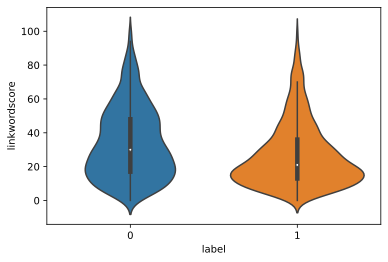

In [ ]:
sns.violinplot(x='label', y='linkwordscore', data=df)

In [ ]:
features_df = df.drop('label', axis=1)
num_features = features_df.select_dtypes(np.number)
num_features.sample(5)

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
1439,2.754386,0.542857,0.342857,0.178571,0.064286,0.372462,0.000000,0.025801,0,0.219906,0.497382,1,1,12,11829,140,5,0.028571,0.073892
3112,1.380000,0.196721,0.032787,0.000000,0.000000,0.697749,0.019608,0.017310,0,0.162962,2.313725,0,0,13,2230,61,1,0.754098,0.071429
3078,4.255474,0.833333,0.469136,0.376543,0.277778,0.516129,0.000000,0.020548,0,0.212683,0.093596,1,1,58,2252,162,0,0.000000,0.028986
5778,1.092593,0.376147,0.330275,0.018349,0.000000,0.494774,0.000000,0.038136,0,0.217851,0.070423,1,0,21,2011,109,4,0.100917,0.107463
5632,0.507463,0.141026,0.064103,0.064103,0.051282,0.502396,0.000000,0.063433,0,0.208990,0.132653,1,0,8,1707,78,6,0.397436,0.092857


In [ ]:
num_features.columns

Index(['avglinksize', 'commonlinkratio_1', 'commonlinkratio_2',
       'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio',
       'embed_ratio', 'frameTagRatio', 'hasDomainLink', 'html_ratio',
       'image_ratio', 'is_news', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio'],
      dtype='object')

In [ ]:
num_features.describe()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.056423,0.021231,0.233778,0.275709,0.615551,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221
std,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.041446,0.144162,0.052487,1.919320,0.486498,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.028502,0.000000,0.201061,0.025900,0.000000,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739
50%,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.045775,0.000000,0.230564,0.083051,1.000000,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312
75%,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.073459,0.000000,0.260770,0.236700,1.000000,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376
max,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.444444,1.000000,0.716883,113.333333,1.000000,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000


In [ ]:
cat_features = df.select_dtypes(include=[np.object])
cat_features = cat_features[['alchemy_category', 'news_front_page']]
cat_features.head(5)

,alchemy_category,news_front_page
0,business,0
1,recreation,0
2,health,0
3,health,0
4,sports,0


In [ ]:
pd.get_dummies(cat_features).head(5)

,alchemy_category_?,alchemy_category_arts_entertainment,alchemy_category_business,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


## Modeling.

In [ ]:
# More robust way to do feature pre-processing.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

features_df = df.drop('label', axis=1)
FEATURE_COLUMNS = features_df.columns
NUM_FEATURES = features_df.select_dtypes(include=[np.number]).columns
CAT_FEATURES = ['alchemy_category', 'news_front_page']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
  transformers=[
      ('num', numeric_transformer, NUM_FEATURES),
      ('cat', categorical_transformer, CAT_FEATURES)
  ])

In [ ]:
features_df = preprocessor.fit_transform(df.drop('label', axis=1))
features_df.shape

(7395, 36)

In [ ]:
features_df

array([[-0.08194111,  1.02520913, -0.05586734, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.10629082,  0.19589891,  0.50902122, ...,  1.        ,
         0.        ,  0.        ],
       [-0.04396462,  0.46172309,  0.73347932, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.08838666, -0.75049855, -0.29323563, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20135342, -1.26873084, -1.10028781, ...,  0.        ,
         1.        ,  0.        ],
       [-0.18605119,  0.18553935,  1.46466303, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
target = df['label']
target.shape

(7395,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.25)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

baseline = DummyClassifier(strategy='most_frequent')
#model = LogisticRegressionCV()
model = RandomForestClassifier()

In [ ]:
baseline.fit(x_train, y_train)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import classification_report
baseline_predictions = baseline.predict(x_test)
model_predictions = model.predict(x_test)

In [ ]:
print(classification_report(y_test, baseline_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       877
           1       0.53      1.00      0.69       972

    accuracy                           0.53      1849
   macro avg       0.26      0.50      0.34      1849
weighted avg       0.28      0.53      0.36      1849



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, model_predictions))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       877
           1       0.71      0.68      0.69       972

    accuracy                           0.68      1849
   macro avg       0.68      0.68      0.68      1849
weighted avg       0.68      0.68      0.68      1849



## Submission.

In [ ]:
test_df = pd.read_csv('test.tsv', sep='\t')
test_df['is_news'] = test_df['is_news'].str.replace('?', '0').astype(int)

In [ ]:
sub_model = RandomForestClassifier()
sub_model.fit(features_df, target)

test_features = preprocessor.transform(test_df[df.drop('label', axis=1).columns])
predictions = sub_model.predict(test_features)

In [ ]:
sub_df = pd.DataFrame({'urlid' : test_df.urlid, 'label': predictions})
sub_df.head()

,urlid,label
0,5865,1
1,782,0
2,6962,0
3,7640,0
4,3589,0


In [ ]:
sub_df.to_csv('submission.csv', index=False)